In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [5]:
# データの読み込み
df = pd.read_csv('housing.csv')

In [6]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: xlabel='x6', ylabel='Count'>

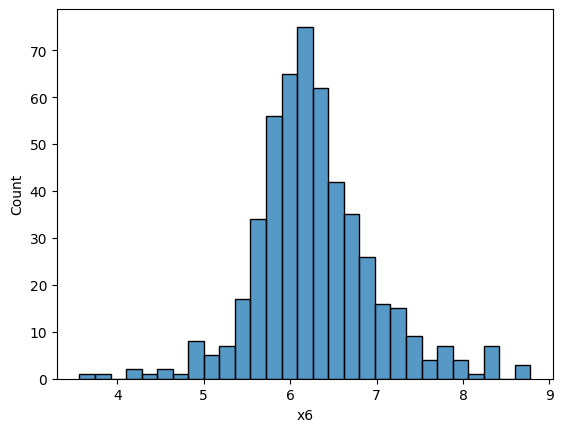

In [7]:
sns.histplot(df['x6'])

外れ値の除去（3sigma法）

In [8]:
col = 'x6'

In [10]:
# 平均
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [11]:
mean[col]

6.284634387351779

In [13]:
# 標準偏差
sigma = df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [14]:
sigma[col]

0.7026171434153237

In [16]:
low = mean[col] - 3 * sigma[col]
low

4.176782957105807

In [18]:
high = mean[col] + 3 * sigma[col]
high

8.39248581759775

In [22]:
df2 = df[(df[col] > low) & (df[col] < high)]
df2

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: xlabel='x6', ylabel='Count'>

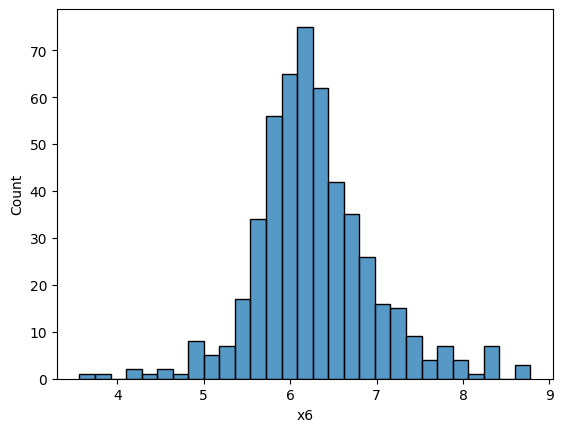

In [24]:
sns.histplot(df['x6'])

<Axes: xlabel='x6', ylabel='Count'>

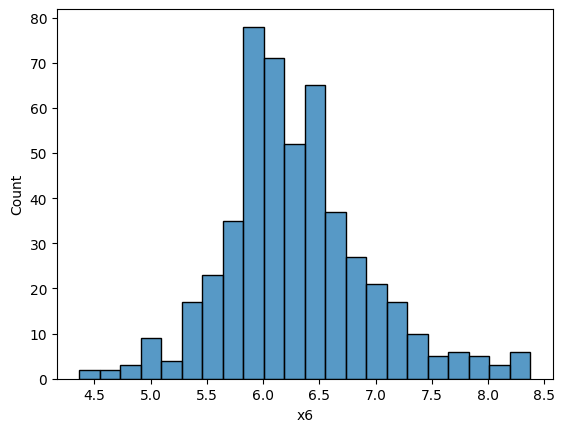

In [25]:
# 端の外れ値が除去された
sns.histplot(df2['x6'])

In [28]:
cols = df.columns

In [29]:
_df = df
for col in cols:
    # ３σ法の上下限値を設定
    low = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]
    # 条件での絞り込み
    _df = _df[(_df[col] > low) & (_df[col] < high)]

In [31]:
len(df)

506

In [32]:
_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


対処法

- 外れ値は取り除く
- 外れ値を平均値もしくは中央値などで埋める
- 主成分分析等を使う，その後外れ値除去

モデルを構築し学習

In [33]:
_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [34]:
X = _df.iloc[:, :-1]
y = _df.iloc[:, -1]

In [40]:
# データの分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [41]:
# 重回帰分析
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
model.score(X_train, y_train)

0.7461131539373449

In [44]:
model.score(X_test, y_test)

0.7320839899847014

In [45]:
# スケーリング
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
# scalerの学習(平均と標準偏差を計算)
scaler.fit(X_train)

StandardScaler()

In [48]:
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [49]:
X_train2

array([[-0.42537133, -0.49271294,  1.62083011, ...,  1.30088815,
         0.40620874,  0.06109524],
       [-0.38484314, -0.49271294, -0.63190307, ..., -0.5221278 ,
         0.07502824, -0.08243518],
       [ 0.5126504 , -0.49271294,  1.07667085, ...,  0.82114711,
         0.01887241, -1.35003542],
       ...,
       [-0.48060731, -0.49271294,  2.16068204, ...,  0.29343197,
         0.06153497,  0.31340661],
       [-0.44817076, -0.49271294, -0.52996295, ..., -0.28225728,
         0.36056972,  0.99782008],
       [-0.47825513, -0.49271294, -1.16888345, ..., -0.33023138,
         0.32604282,  0.26959206]])

In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train2, y_train)

LinearRegression()

In [52]:
model.score(X_train2, y_train)

0.7461131539373449

In [53]:
model.score(X_test2, y_test)

0.7320839899847016

In [54]:
# 重みの確認(どの変数が効いているか)
np.set_printoptions(precision=2, suppress=True)

In [55]:
model.coef_

array([-0.94,  0.31,  0.31,  0.  , -1.21,  2.74, -0.49, -2.44,  2.13,
       -1.94, -1.77,  0.18, -3.43])

<Axes: xlabel='x6', ylabel='Count'>

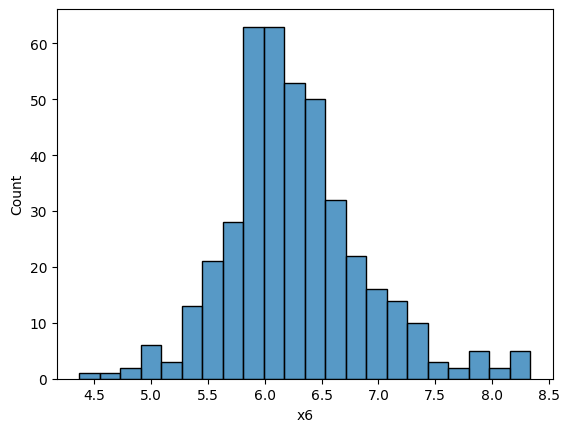

In [57]:
sns.histplot(_df['x6'])